In [ ]:
import pandas as pd
pd.set_option('display.width', None)  # Auto-adjust width
pd.set_option('display.max_colwidth', None)  # No limit on column width

In [ ]:
df_train = pd.read_csv("train_E6oV3lV.csv")
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [ ]:
df_train.shape

(31962, 3)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
df_train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [ ]:
df_train.groupby('label').describe()

id                                                                      
         count          mean          std   min      25%      50%       75%      max
label                                                                               
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25  31962.0
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00  31961.0

In [ ]:
df_train[df_train["label"] == 0].count()

,0
id,29720
label,29720
tweet,29720


In [ ]:
#df.query('label == 0').count()
len(df_train[df_train["label"] == 0])

29720

In [ ]:
len(df_train[df_train["label"] == 1])

2242

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

<ipython-input-16-22e552f42bad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_train, x="label", palette='viridis')


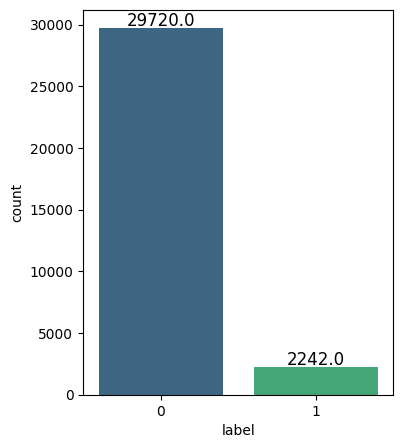

In [ ]:
plt.figure(figsize=(4,5))
ax = sns.countplot(data=df_train, x="label", palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5),  # Adjust text position (optional)
                textcoords='offset points')

# Show the plot
plt.show()

In [ ]:
df_test = pd.read_csv("test_tweets_anuFYb8.csv")

In [ ]:
df_test.shape

(17197, 2)

In [ ]:
df_test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


# Cleanse data

In [ ]:
import re

In [ ]:
def clean_text(text):
    text = re.sub(r"http\S+", "", text) # remove URLs
    text = re.sub(r"@\w+", "", text) #remove mentions
    text = re.sub(r"#\w+", "", text) #remove hashtags
    #text = re.sub(r"[^\w\s]", "", text) #remove special characters
    return text.lower().strip()

In [ ]:
df_train['tweet'][3]

'#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  '

In [ ]:
df_train['cleaned_tweet']= df_train['tweet'].apply(clean_text)

In [ ]:
df_train.head()

,id,label,tweet,cleaned_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation,factsguide: society now


In [ ]:
def decode_text(text):
    try:
        #Handling the characters's error
        return text.encode('latin1').decode('utf-8', errors='ignore')
    except UnicodeDecodeError:
        return text

In [ ]:
def contains_invalid_encoding(text):
    # Check if the text is a string and identify any invalid characters.
    if isinstance(text, str):
        # Regex find the character are not included in Unicode
        return bool(re.search(r'[^\x00-\x7F]+', text))  # Find characters outside the standard ASCII character set.
    return False  

In [ ]:
# Ensure 'tweet' is string type before applying checking function 
# # df_train['cleaned_tweet'] = df_train['cleaned_tweet'].astype(str)

# Create a new column for redecoded tweets
df_train['decoded_tweet'] = df_train['cleaned_tweet'].apply(lambda x: decode_text(x) if contains_invalid_encoding(x) else x)

# Filter out tweets contain incorrect decoded characters (Outside ASCII)
invalid_tweets = df_train[df_train['cleaned_tweet'].apply(contains_invalid_encoding)]

# Kiểm tra các tweet đã được mã hóa lại
invalid_tweets_after_decoding = df_train[df_train['cleaned_tweet'] != df_train['decoded_tweet']]

print(f"Tweets containing incorrectly encoded characters (outside ASCII):")
print(invalid_tweets[['cleaned_tweet']])

Những tweet chứa ký tự mã hóa sai (ngoài bảng ASCII):
                                                                     cleaned_tweet
3      i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦
6                                                 camping tomorrow        dannyâ¦
7      the next school year is the year for exams.ð¯ can't think about that ð­
8                                             we won!!! love the land!!!       â¦
10       â  consumer price index (mom) climbed from previous 0.2% to 0.5% in may
...                                                                            ...
31939                                       whew  ð it's a productive and   !!!
31942                                             this week is flying by    -   ¦
31945                                                    feel like... ðð¶ð
31955                                   less than 2 weeks ððð¼ð¹ððµ
31957               ate  isz that

In [ ]:
print(f"Redecoded tweets:")
print(invalid_tweets_after_decoding[['cleaned_tweet', 'decoded_tweet']])

Những tweet đã được mã hóa lại:
                                                                     cleaned_tweet  \
3      i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦   
6                                                 camping tomorrow        dannyâ¦   
7      the next school year is the year for exams.ð¯ can't think about that ð­   
8                                             we won!!! love the land!!!       â¦   
10       â  consumer price index (mom) climbed from previous 0.2% to 0.5% in may   
...                                                                            ...   
31939                                       whew  ð it's a productive and   !!!   
31942                                             this week is flying by    -   ¦   
31945                                                    feel like... ðð¶ð   
31955                                   less than 2 weeks ððð¼ð¹ððµ   
31957               at

In [ ]:
repeated_char_train = []
for i, tweet in enumerate(df_train['decoded_tweet']):
  if re.match(r'\w*(\w)\1+',tweet):
    repeated_char_train.append(i)

len(repeated_char_train)

4583

In [ ]:
#Repeated char function
def repeated_char(text):
  text = re.sub(r'(\w)\1{2,}',r'\1',text)
  return text

In [ ]:
df_train['clean_duplicate']=df_train['decoded_tweet'].apply(repeated_char)


In [ ]:
df_train.head()

,id,label,tweet,cleaned_tweet,decoded_tweet,clean_duplicate
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦,i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦
4,5,0,factsguide: society now #motivation,factsguide: society now,factsguide: society now,factsguide: society now


In [ ]:
lengths = [len(tokenizer.tokenize(tweet)) for tweet in df_train['clean_duplicate']]
print(f"Maximum length: {max(lengths)}")
print(f"Average length: {sum(lengths) / len(lengths)}")


Độ dài lớn nhất: 142
Độ dài trung bình: 16.88749139603279


In [ ]:
assert len(train_encodings["input_ids"]) == len(train_encodings["labels"]), "Mismatch between input_ids and labels!"

In [ ]:
print(train_encodings['input_ids'].shape) 
print(train_encodings['labels'].shape)    

torch.Size([31962, 128])
torch.Size([31962])


In [ ]:
len(train_encodings[100])

128

In [ ]:
train_encodings

{'input_ids': tensor([[    0, 14746,    10,  ...,     1,     1,     1],
        [    0, 39563,    13,  ...,     1,     1,     1],
        [    0,   428,  4001,  ...,     1,     1,     1],
        ...,
        [    0,  8458,  4226,  ...,     1,     1,     1],
        [    0,   705, 17856,  ...,     1,     1,     1],
        [    0, 31653,    47,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([0, 0, 0,  ..., 0, 1, 0])}

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch.utils.data import DataLoader
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss

# 1. Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-roberta-large")
model = AutoModelForSequenceClassification.from_pretrained("j-hartmann/emotion-english-roberta-large")

# Update classifier for 2 output labels
model.num_labels = 2
model.classifier = torch.nn.Linear(model.config.hidden_size, model.num_labels)

# 2. Prepare train dataset
def tokenize_tweets(tweets, labels=None):
    encodings = tokenizer(list(tweets), padding=True, truncation=True, max_length=128, return_tensors="pt")
    if labels is not None:
        encodings['labels'] = torch.tensor(labels, dtype=torch.long)
    return encodings

# Tokenize data
train_encodings = tokenize_tweets(df_train['clean_duplicate'], labels=df_train['label'].tolist())

# Dataset class
class TweetDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.encodings.items()}

train_dataset = TweetDataset(train_encodings)

# 3. Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, collate_fn=custom_data_collator)

# 4. Optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# 5. Training loop
num_epochs = 3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function
loss_fn = CrossEntropyLoss()

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    for batch in train_loader:
        # Move batch to the same device as the model
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits[:, 0, :]

        # Calculate loss using logits and labels
        loss = loss_fn(logits, labels)

        # Backward pass
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()        # Compute gradients
        optimizer.step()       # Update parameters

    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {loss.item()}")

# Save model after training
model.save_pretrained('./results')
